In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('2019.xlsx')
df.head()

,District,Type,Year,PM10,PM25,SO2,NO2,AQI,AQI_diwali
0,Ahmedabad,SA,2019,101.0,NaN,13.7,31.4,101,107
1,Ahmedabad,CA,2019,101.0,NaN,19.5,21.1,101,110
2,Ahmedabad,CA,2019,111.0,NaN,17.7,19.9,107,112
3,Ahmedabad,CA,2019,100.0,21.0,19.6,22.8,100,111
4,Ahmedabad,CA,2019,97.0,23.0,18.3,19.1,97,111


In [3]:
df.isna().sum()

District       0
Type           0
Year           0
PM10           1
PM25          10
SO2            0
NO2            0
AQI            0
AQI_diwali     0
dtype: int64

In [4]:
df['PM25'].fillna(value=df['PM25'].mean(),inplace=True)
df['PM10'].fillna(value=df['PM10'].mean(),inplace=True)

In [5]:
df.isna().sum()

District      0
Type          0
Year          0
PM10          0
PM25          0
SO2           0
NO2           0
AQI           0
AQI_diwali    0
dtype: int64

In [6]:
import plotly.express as px

In [7]:
plt.figure(figsize=(30,3))
px.bar(df[['AQI','District']].groupby(["District"]).mean().sort_values(by='AQI'))

<Figure size 3000x300 with 0 Axes>

In [8]:
plt.figure(figsize=(30,3))
px.bar(df[['SO2','District']].groupby(["District"]).mean().sort_values(by='SO2'))

<Figure size 3000x300 with 0 Axes>

In [9]:
plt.figure(figsize=(30,3))
px.bar(df[['NO2','District']].groupby(["District"]).mean().sort_values(by='NO2'))

<Figure size 3000x300 with 0 Axes>

In [10]:
plt.figure(figsize=(30,3))
px.bar(df[['PM10','District']].groupby(["District"]).mean().sort_values(by='PM10'))

<Figure size 3000x300 with 0 Axes>

In [11]:
plt.figure(figsize=(30,3))
px.bar(df[['PM25','District']].groupby(["District"]).mean().sort_values(by='PM25'))

<Figure size 3000x300 with 0 Axes>

In [12]:
df2=pd.read_excel('bar.xlsx')
df2.head()

,District,2017,2018,2019,2021,Districts,chemical_fertilizers,production_minerals,vehicles_registered,AQI
0,Ahmedabad,106.0,184.0,95.0,116.0,Ahmedabad,81138.0,0.0,4950637.0,95.0
1,Anand,99.0,114.0,113.0,57.0,Anand,74560.0,0.0,570783.0,113.0
2,Bharuch,92.0,88.0,92.0,61.0,Banas Kantha,168437.0,0.0,419360.0,92.0
3,Bhavnagar,69.0,81.0,103.0,82.0,Bhavnagar,69282.0,2254345.0,784725.0,103.0
4,Botad,NaN,NaN,NaN,300.0,Botad,39490.0,0.0,671027.0,73.0


In [13]:
plt.figure(figsize=(30,3))
px.bar(df2[['production_minerals','Districts']].groupby(["Districts"]).mean().sort_values(by='production_minerals'))

<Figure size 3000x300 with 0 Axes>

In [14]:
plt.figure(figsize=(30,3))
px.bar(df2[['chemical_fertilizers','Districts']].groupby(["Districts"]).mean().sort_values(by='chemical_fertilizers'))

<Figure size 3000x300 with 0 Axes>

In [15]:
plt.figure(figsize=(30,3))
px.bar(df2[['vehicles_registered','Districts']].groupby(["Districts"]).mean().sort_values(by='vehicles_registered'))

<Figure size 3000x300 with 0 Axes>

In [16]:
px.box(data_frame=df,y='AQI')

<AxesSubplot:ylabel='AQI'>

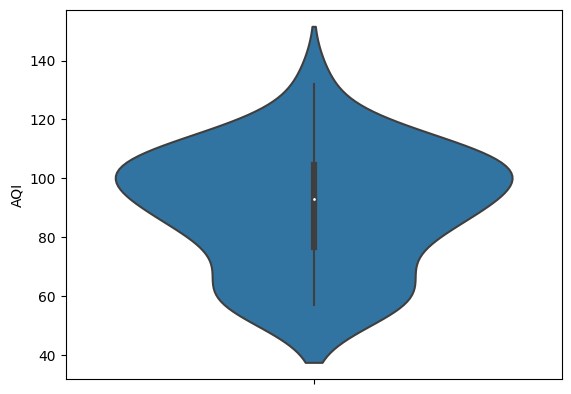

In [31]:
sns.violinplot(data=df,y='AQI')

C:\Users\aryannijhara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='AQI', ylabel='Density'>

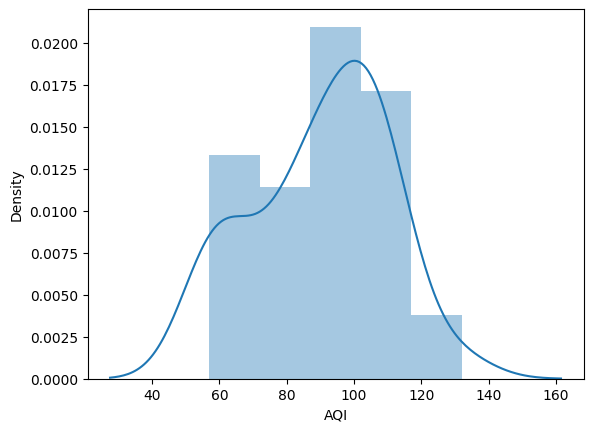

In [17]:
sns.distplot(df['AQI'])

In [18]:
from scipy.stats import shapiro
normality=df['AQI']
shapiro(normality)

ShapiroResult(statistic=0.9442698359489441, pvalue=0.0755661353468895)

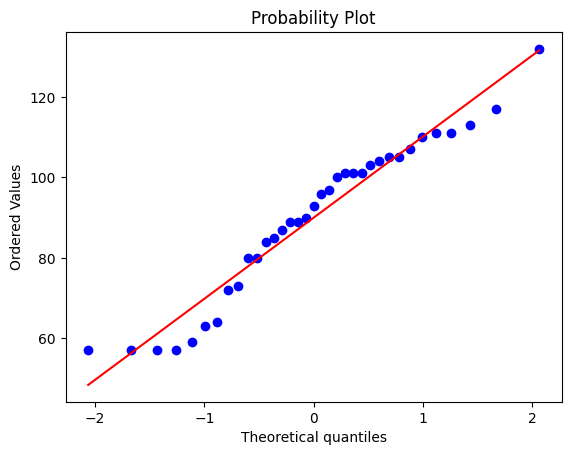

In [19]:
import scipy.stats
import pylab
scipy.stats.probplot(df.AQI,plot=pylab)
plt.show()

In [20]:
corr=df.corr
corr()

,Year,PM10,PM25,SO2,NO2,AQI,AQI_diwali
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PM10,NaN,1.000000,0.157238,-0.201255,0.235438,0.759427,0.520540
PM25,NaN,0.157238,1.000000,-0.204109,-0.278368,0.284533,0.390849
SO2,NaN,-0.201255,-0.204109,1.000000,0.613311,0.200785,0.093905
NO2,NaN,0.235438,-0.278368,0.613311,1.000000,0.202351,0.046794
AQI,NaN,0.759427,0.284533,0.200785,0.202351,1.000000,0.463811
AQI_diwali,NaN,0.520540,0.390849,0.093905,0.046794,0.463811,1.000000


In [21]:
df.describe()

,Year,PM10,PM25,SO2,NO2,AQI,AQI_diwali
count,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2019.0,86.343824,33.280800,17.429714,18.373143,90.000000,119.457143
std,0.0,26.628624,11.124492,15.197015,7.533714,19.979401,41.721304
min,2019.0,21.810000,15.000000,3.300000,0.880000,57.000000,57.000000
25%,2019.0,72.500000,25.620000,11.445000,16.450000,76.500000,100.000000
50%,2019.0,89.000000,33.280800,14.650000,18.600000,93.000000,110.000000
75%,2019.0,103.000000,35.500000,18.500000,20.500000,104.500000,136.000000
max,2019.0,148.000000,64.000000,95.850000,35.500000,132.000000,246.000000


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif=pd.DataFrame()
    vif['features']=dataset.columns
    vif['vif_value']=[variance_inflation_factor(dataset.values,i)
                      for i in range(dataset.shape[1])]
    return (vif[['features','vif_value']])

In [23]:
x=df[['PM10','PM25','SO2','NO2']]
y=df['AQI']

In [24]:
features=x
calculate_vif(features)

,features,vif_value
0,PM10,14.141569
1,PM25,7.054091
2,SO2,4.679116
3,NO2,14.430724


In [25]:
# Regression in R

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
x=df[['SO2','NO2','PM10','PM25']]
y=df['AQI']

In [35]:
model=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[ 59.98048852 111.94105203  89.0745251  100.15786531  63.700321
  97.07271495 133.09279748]


In [36]:
model.score(x_test,y_test)

0.7422411900360874

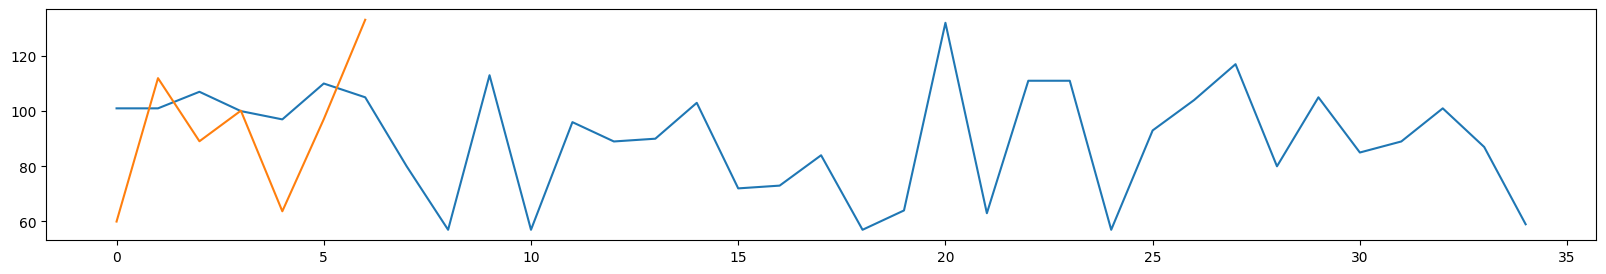

In [37]:
plt.figure(figsize=(20,3))
plt.plot(y)
plt.plot(y_pred)

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model1=ols("AQI~PM25+SO2+NO2+PM10",data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     36.26
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           4.34e-11
Time:                        11:41:53   Log-Likelihood:                -123.10
No. Observations:                  35   AIC:                             256.2
Df Residuals:                      30   BIC:                             264.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.8080      7.628      2.859      0.0

eval_env: 1


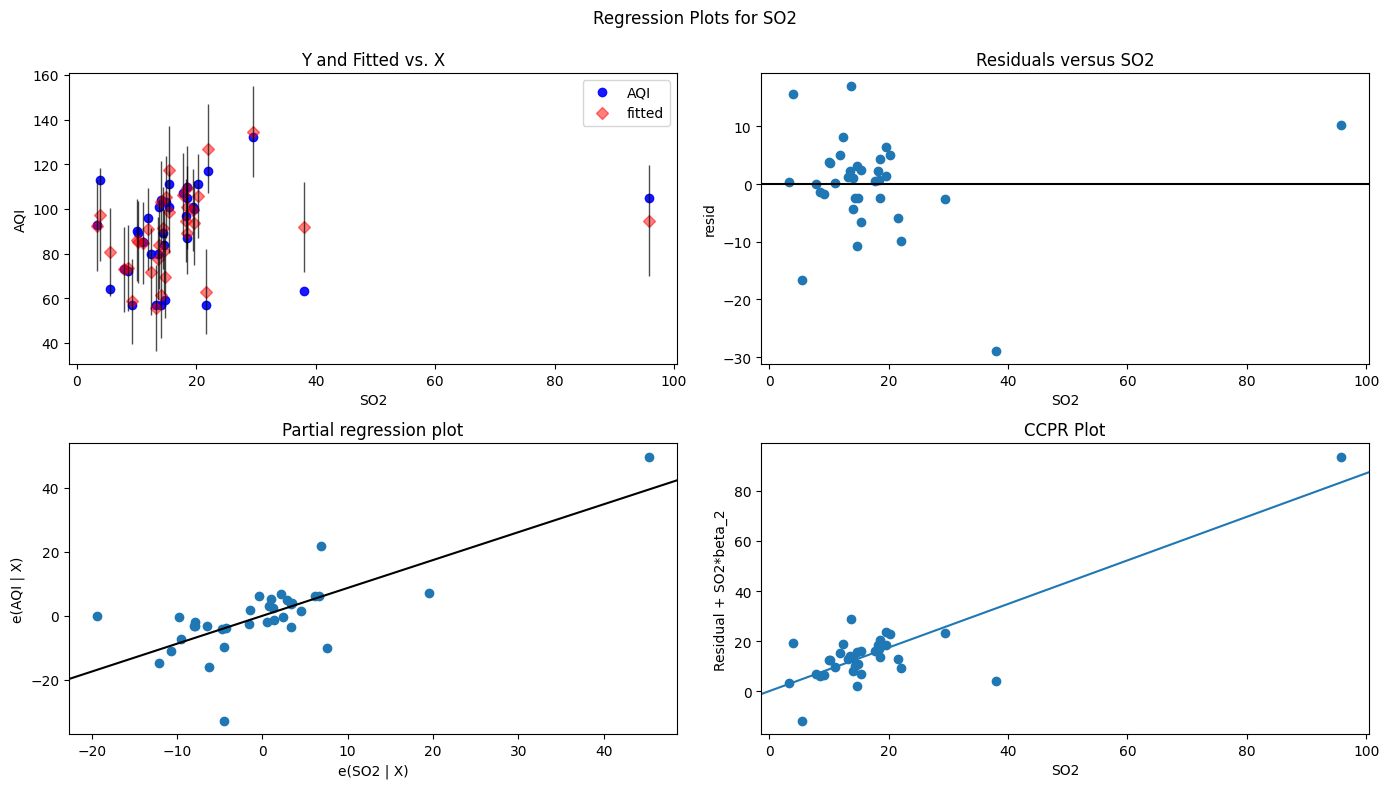

In [41]:
fig=plt.figure(figsize=(14,8))
fig=sm.graphics.plot_regress_exog(model1,'SO2',fig=fig)

eval_env: 1


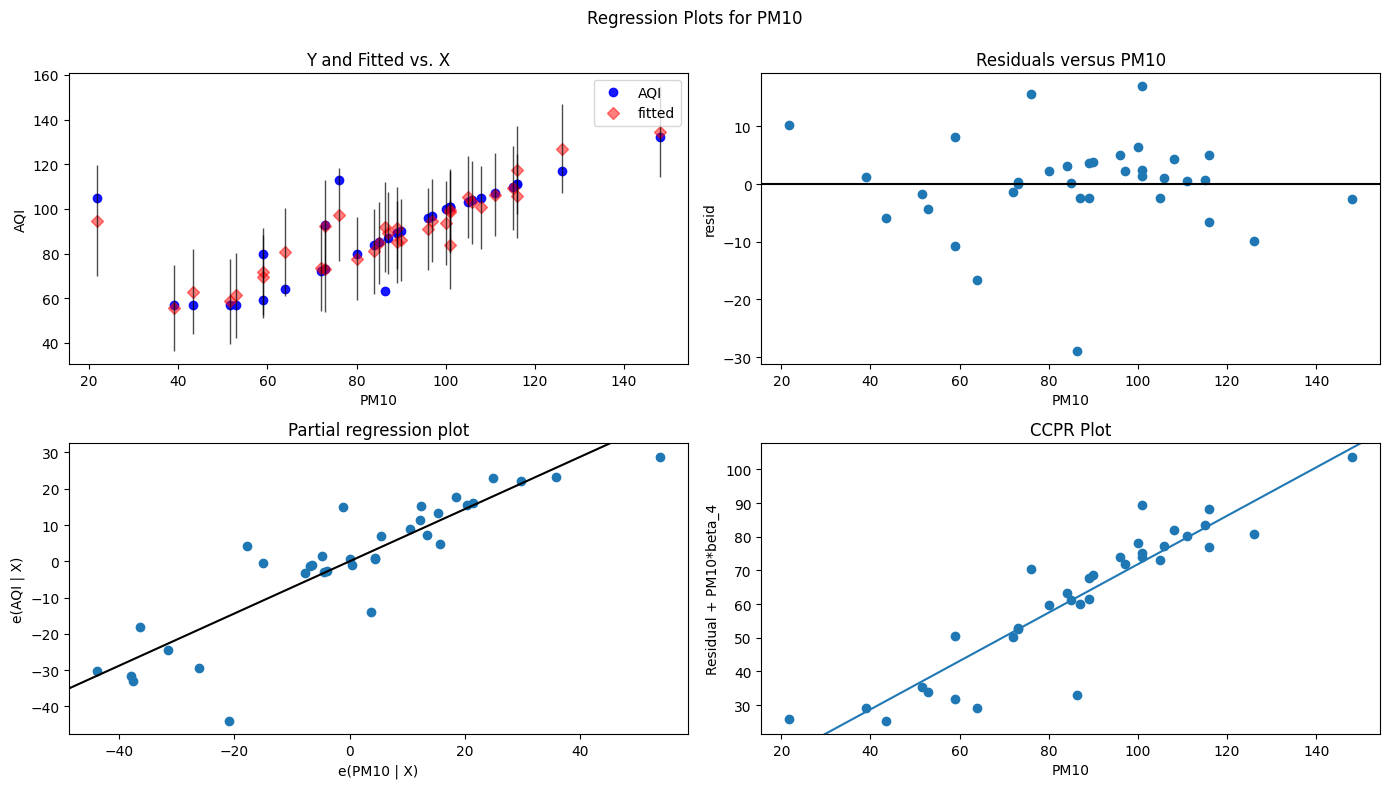

In [42]:
fig=plt.figure(figsize=(14,8))
fig=sm.graphics.plot_regress_exog(model1,'PM10',fig=fig)

eval_env: 1


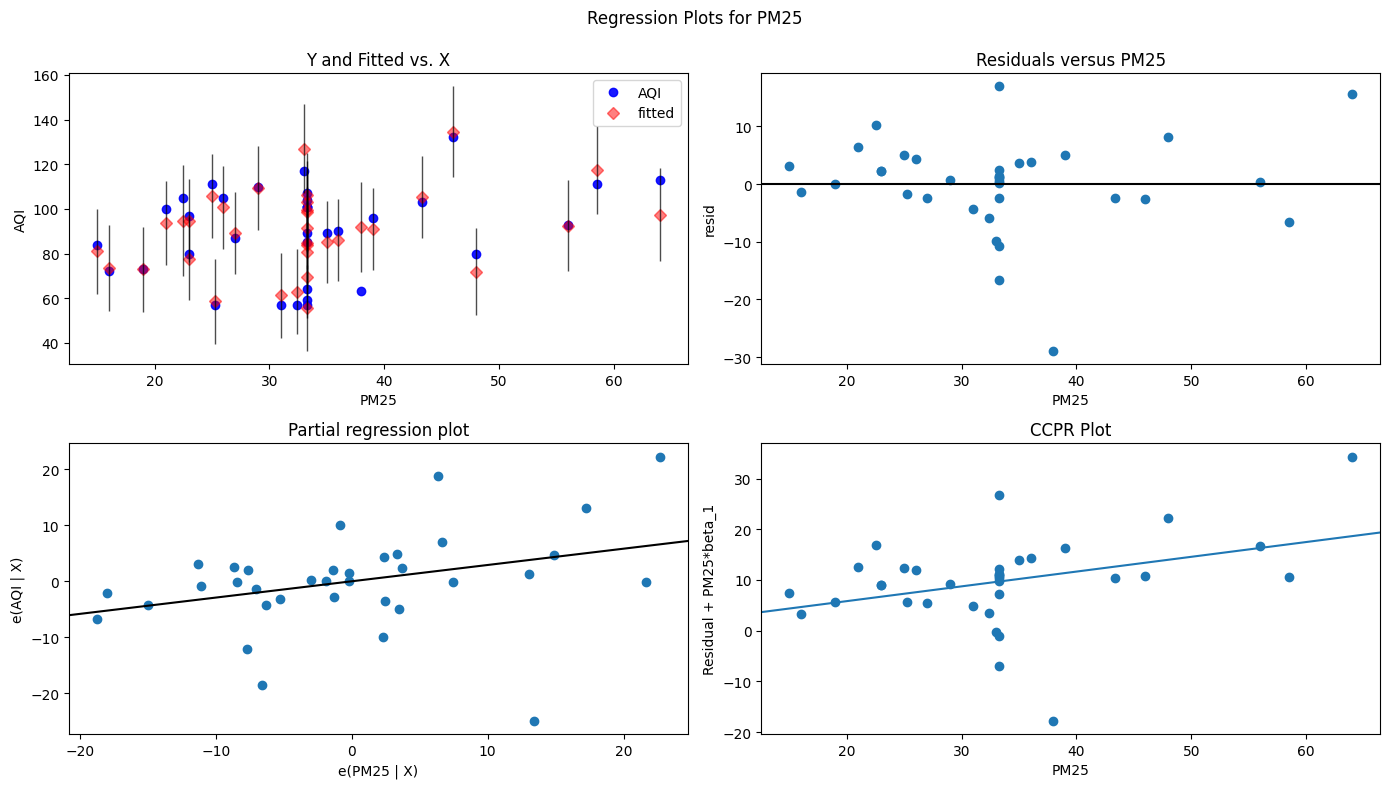

In [43]:
fig=plt.figure(figsize=(14,8))
fig=sm.graphics.plot_regress_exog(model1,'PM25',fig=fig)

eval_env: 1


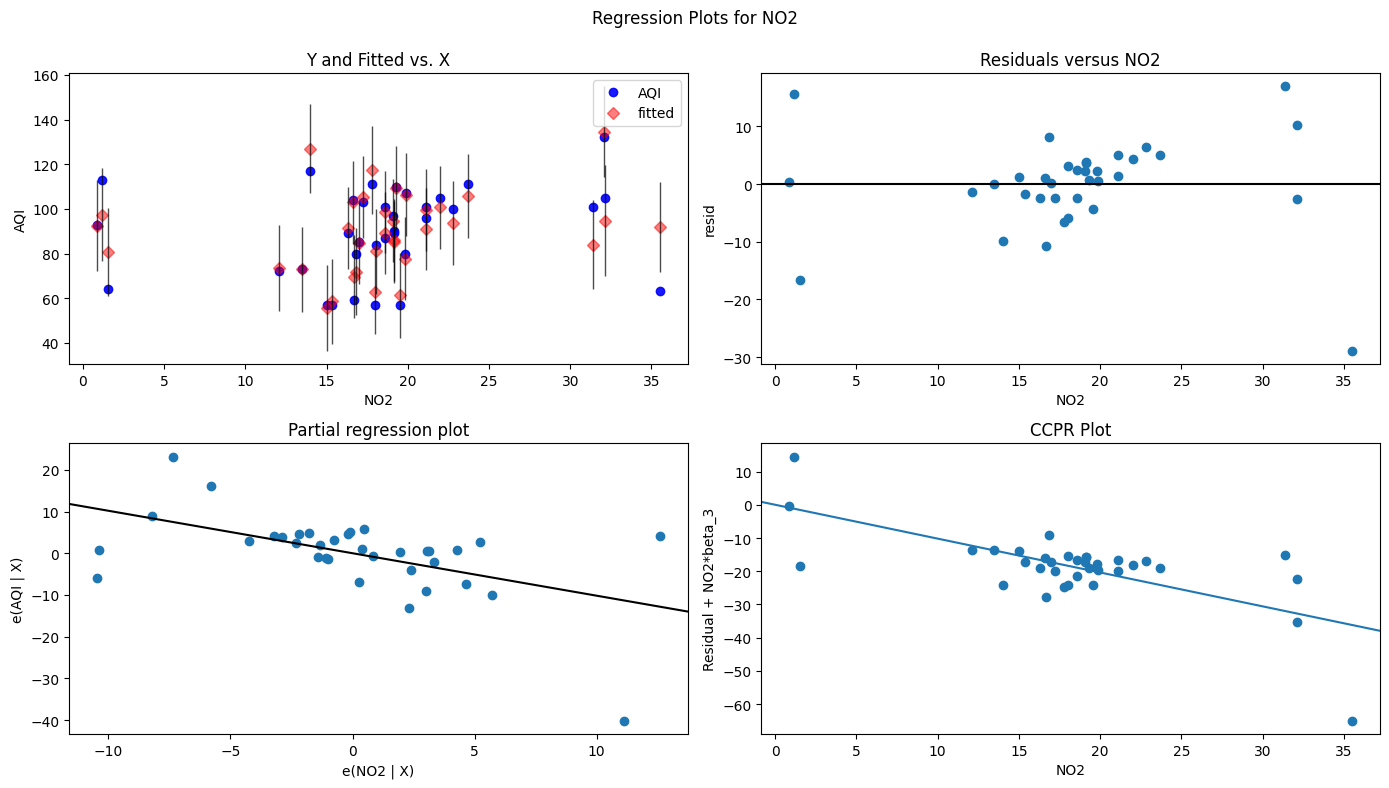

In [44]:
fig=plt.figure(figsize=(14,8))
fig=sm.graphics.plot_regress_exog(model1,'NO2',fig=fig)

In [49]:
df.head()

,District,Type,Year,PM10,PM25,SO2,NO2,AQI,AQI_diwali
0,Ahmedabad,SA,2019,101.0,33.2808,13.7,31.4,101,107
1,Ahmedabad,CA,2019,101.0,33.2808,19.5,21.1,101,110
2,Ahmedabad,CA,2019,111.0,33.2808,17.7,19.9,107,112
3,Ahmedabad,CA,2019,100.0,21.0000,19.6,22.8,100,111
4,Ahmedabad,CA,2019,97.0,23.0000,18.3,19.1,97,111


In [55]:
plt.figure(figsize=(30,3))
px.bar(df[['AQI','District']].groupby(["District"]).mean().sort_values(by='AQI'))

<Figure size 3000x300 with 0 Axes>

In [53]:
df.columns

Index(['District', 'Type', 'Year', 'PM10', 'PM25', 'SO2', 'NO2', 'AQI',
       'AQI_diwali'],
      dtype='object')

In [54]:
plt.figure(figsize=(30,3))
px.bar(df[['AQI_diwali','District']].groupby(["District"]).mean().sort_values(by='AQI_diwali'))

<Figure size 3000x300 with 0 Axes>

In [74]:
df1=pd.read_excel('bar.xlsx')
df1.head()

,District,year,year2017,year2018,year2019,year2021,Districts,chemical_fertilizers,production_minerals,vehicles_registered,AQI
0,Ahmedabad,2017,106.0,184.0,95.0,116.0,Ahmedabad,81138,0.0,4950637.0,95.0
1,Anand,2017,99.0,114.0,113.0,57.0,Anand,74560,0.0,570783.0,113.0
2,Bharuch,2017,92.0,88.0,92.0,61.0,Banas Kantha,168437,0.0,419360.0,92.0
3,Bhavnagar,2017,69.0,81.0,103.0,82.0,Bhavnagar,69282,2254345.0,784725.0,103.0
4,Botad,2017,NaN,NaN,NaN,300.0,Botad,39490,0.0,671027.0,73.0


<Figure size 500x2000 with 0 Axes>

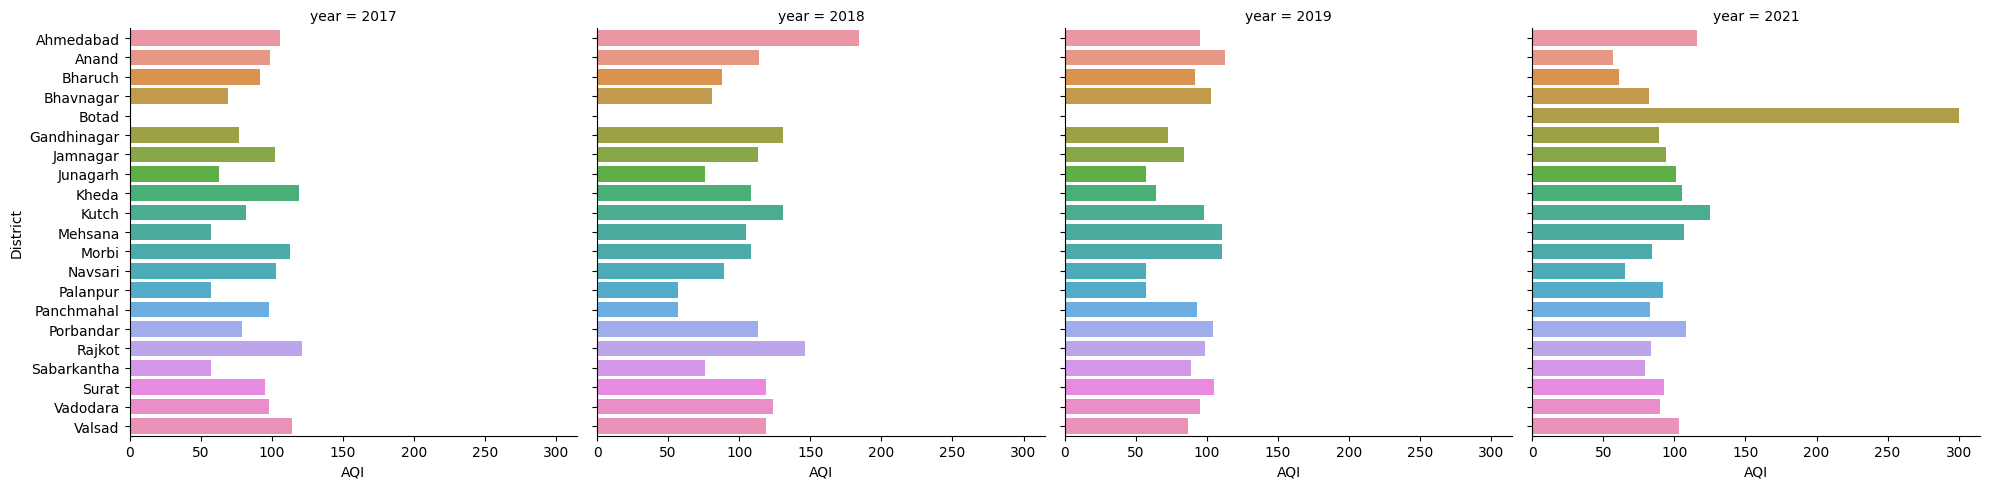

In [73]:
plt.figure(figsize=(5,20))
sns.catplot(
    data=df1,x='AQI',y='District',col='year',
    kind='bar'
)

In [80]:
plt.figure(figsize=(30,3))
px.bar(df1[['year2021','District']].groupby(["District"]).mean().sort_values(by='year2021'))

<Figure size 3000x300 with 0 Axes>